<a href="https://colab.research.google.com/github/Kzis/mrt-is/blob/master/Inbound_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# อ่านข้อมูล Inbound สำหรับการสร้าง Model

In [2]:
inbound_url = 'https://raw.githubusercontent.com/Kzis/mrt-is/master/Data/Inbound/All_Summary.csv'
inbound_df = pd.read_csv(inbound_url)
inbound_df.head()

,TransactionDate,StationName,PassengerCount,DayType,DateOfWeek,DayNumberOfMonth,MonthPeriod,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total
0,2017-01-01,Bang Sue,186,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,Chatuchak Park,359,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,Hua Lamphong,299,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,Huai Khwang,431,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Kamphaeng Phet,233,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# แปลงข้อมูล Category บาง Field อีกรอบเพื่อให้เข้า Model Regression ต่างๆได้

In [3]:
stations_dummies = pd.get_dummies(inbound_df['StationName'])
day_type_dummies = pd.get_dummies(inbound_df['DayType'])
date_of_week_dummies = pd.get_dummies(inbound_df['DateOfWeek'])
month_period_dummies = pd.get_dummies(inbound_df['MonthPeriod'])

In [4]:
inbound_df =pd.concat([inbound_df ,stations_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,day_type_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,date_of_week_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,month_period_dummies ], axis=1)

In [5]:
station_LP_df = inbound_df.loc[inbound_df['StationName'] == 'Lat Phrao']
station_LP_df.drop('TransactionDate', axis=1, inplace=True)
station_LP_df.drop('StationName', axis=1, inplace=True)
station_LP_df.drop('DayType', axis=1, inplace=True)
station_LP_df.drop('DateOfWeek', axis=1, inplace=True)
station_LP_df.drop('MonthPeriod', axis=1, inplace=True)
print(station_LP_df.shape)

(365, 83)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
station_PR9_df = inbound_df.loc[inbound_df['StationName'] == 'Phra Ram 9']
station_PR9_df.drop('TransactionDate', axis=1, inplace=True)
station_PR9_df.drop('StationName', axis=1, inplace=True)
station_PR9_df.drop('DayType', axis=1, inplace=True)
station_PR9_df.drop('DateOfWeek', axis=1, inplace=True)
station_PR9_df.drop('MonthPeriod', axis=1, inplace=True)
print(station_PR9_df.shape)

(365, 83)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
station_Sirikit_df = inbound_df.loc[inbound_df['StationName'] == 'Queen Sirikit National Convention Centre']
station_Sirikit_df.drop('TransactionDate', axis=1, inplace=True)
station_Sirikit_df.drop('StationName', axis=1, inplace=True)
station_Sirikit_df.drop('DayType', axis=1, inplace=True)
station_Sirikit_df.drop('DateOfWeek', axis=1, inplace=True)
station_Sirikit_df.drop('MonthPeriod', axis=1, inplace=True)
print(station_Sirikit_df.shape)

(365, 83)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
station_Sukhumvit_df = inbound_df.loc[inbound_df['StationName'] == 'Sukhumvit']
station_Sukhumvit_df.drop('TransactionDate', axis=1, inplace=True)
station_Sukhumvit_df.drop('StationName', axis=1, inplace=True)
station_Sukhumvit_df.drop('DayType', axis=1, inplace=True)
station_Sukhumvit_df.drop('DateOfWeek', axis=1, inplace=True)
station_Sukhumvit_df.drop('MonthPeriod', axis=1, inplace=True)
print(station_Sukhumvit_df.shape)

(365, 83)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
inbound_df.drop('TransactionDate', axis=1, inplace=True)
inbound_df.drop('StationName', axis=1, inplace=True)
inbound_df.drop('DayType', axis=1, inplace=True)
inbound_df.drop('DateOfWeek', axis=1, inplace=True)
inbound_df.drop('MonthPeriod', axis=1, inplace=True)
inbound_df.head()

,PassengerCount,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,...,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,186,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,359,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,299,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,431,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,233,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [10]:
inbound_df.shape

(8864, 83)

In [11]:
inbound_df.columns

Index(['PassengerCount', 'DayNumberOfMonth', 'MonthNumberOfYear',
       'CalendarQuater', 'Interest_Agriculture', 'Interest_Books',
       'Interest_Business', 'Interest_Education', 'Interest_Family',
       'Interest_Fasion', 'Interest_Foods', 'Interest_General',
       'Interest_Health', 'Interest_IT', 'Interest_Residence',
       'Interest_Seminar', 'Interest_Sports', 'Interest_Travel',
       'Interest_Vehnicle', 'EventsGroup_Agriculture', 'EventsGroup_Books',
       'EventsGroup_Business', 'EventsGroup_Education', 'EventsGroup_Family',
       'EventsGroup_Fasion', 'EventsGroup_Foods', 'EventsGroup_General',
       'EventsGroup_Health', 'EventsGroup_IT', 'EventsGroup_Residence',
       'EventsGroup_Seminar', 'EventsGroup_Sports', 'EventsGroup_Travel',
       'EventsGroup_Vehnicle', 'Interest_Total', 'Events_Total', 'Bang Krasor',
       'Bang Phlu', 'Bang Rak Noi Tha It', 'Bang Rak Yai', 'Bang Son',
       'Bang Sue', 'Chatuchak Park', 'Hua Lamphong', 'Huai Khwang',
       'Kampha

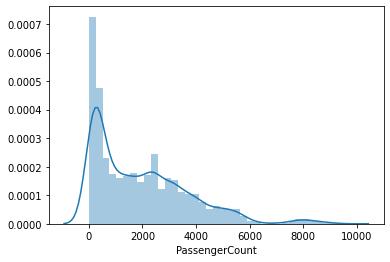

In [12]:
sns.distplot(inbound_df['PassengerCount'])

# เตรียม Train set , Test set สำหรับทุก Model

In [13]:
y = inbound_df['PassengerCount']
inbound_df.drop('PassengerCount', axis=1, inplace=True)
X = inbound_df

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
print("X_train size : {}".format(X_train.shape))
print("X_test size : {}".format(X_test.shape))
print("y_train size : {}".format(y_train.shape))
print("y_test size : {}".format(y_test.shape))

X_train size : (6204, 82)
X_test size : (2660, 82)
y_train size : (6204,)
y_test size : (2660,)


In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def median_absolute_deviation(y_test, y_pred):
  x = np.array([y_test, y_pred])
  return stats.median_absolute_deviation(x, axis=None)

# Train Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred_regression = regression.predict(X_test)

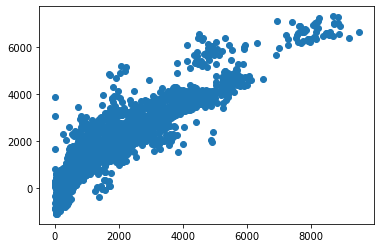

In [21]:
plt.scatter(y_test,y_pred_regression)

In [22]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_regression)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_regression)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_regression))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_regression)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_regression)))

MAE = 523.4916698018558
MSE = 495650.514152278
RMSE = 704.024512465495
MAD = 1861.0728118968852
MAPE = 339.3566839653962


# Train Support Vector Regression

In [23]:
from sklearn.svm import SVR

In [24]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred_svr = svr.predict(X_test)

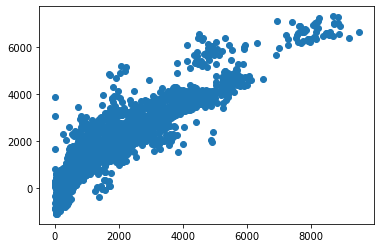

In [26]:
plt.scatter(y_test,y_pred_regression)

In [27]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_svr)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_svr)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_svr)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_svr)))

MAE = 1250.6275524310013
MSE = 2969024.9919470395
RMSE = 1723.0858922140358
MAD = 844.0652800486772
MAPE = 574.981868883155


# Train Regresstion Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [30]:
y_pred_dtr = dtr.predict(X_test)

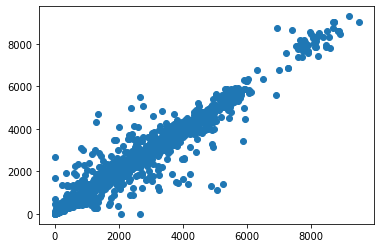

In [31]:
plt.scatter(y_test,y_pred_dtr)

In [32]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_dtr)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_dtr)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_dtr)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_dtr)))

MAE = 172.7342105263158
MSE = 145741.67406015037
RMSE = 381.7612788905527
MAD = 1862.8869
MAPE = 123.84045500148142


# Train Random Forest Regression


In [33]:
from sklearn.ensemble import RandomForestRegressor 

In [34]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0) 
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred_rfr = rfr.predict(X_test)

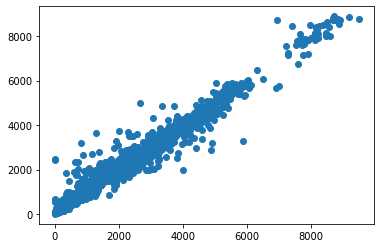

In [36]:
plt.scatter(y_test,y_pred_rfr)

In [37]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_rfr)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_rfr)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_rfr)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_rfr)))

MAE = 134.63584210526318
MSE = 76198.73969383458
RMSE = 276.0411920236445
MAD = 1897.95039
MAPE = 132.4459619971268


# Train Gradient Boosting Regression


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
params = {'n_estimators': 500,
          'max_depth': 20,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=20, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
y_pred_gbr = gbr.predict(X_test)

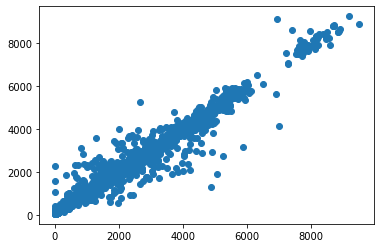

In [41]:
plt.scatter(y_test,y_pred_gbr)

In [42]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_gbr)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_gbr)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_gbr)))

MAE = 156.70015784096452
MSE = 109914.00298663513
RMSE = 331.5328083110857
MAD = 1861.7281758675142
MAPE = 156.81862771836862


# Train Single Layer Percepton Regressor

In [43]:
from sklearn.neural_network import MLPRegressor

In [44]:
slp_params = {'random_state':1, 
          'hidden_layer_sizes':(10,),
          'max_iter':1000}
slp = MLPRegressor(**slp_params)
slp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [45]:
y_pred_slp = slp.predict(X_test)

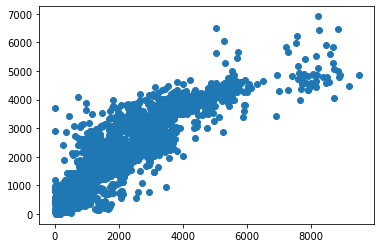

In [46]:
plt.scatter(y_test,y_pred_slp)

In [47]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_slp)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_slp)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_slp))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_slp)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_slp)))

MAE = 542.7881906215094
MSE = 644828.2785829436
RMSE = 803.012004009245
MAD = 1802.8451998743317
MAPE = 352.6694464228682


# Train Multi Layer Percepton Regressor

In [48]:
mlp_params = {'random_state':1, 
              'hidden_layer_sizes':(10,5,),
              'max_iter':1000}
              #3 hidden layers อันแรก 10 , 5, 5 ตามลำดับ
mlp = MLPRegressor(**mlp_params)
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [49]:
y_pred_mlp = mlp.predict(X_test)

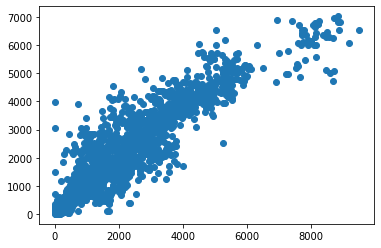

In [50]:
plt.scatter(y_test,y_pred_mlp)

In [51]:
print("MAE = {}".format(metrics.mean_absolute_error(y_test, y_pred_mlp)))
print("MSE = {}".format(metrics.mean_squared_error(y_test, y_pred_mlp)))
print("RMSE = {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp))))
print("MAD = {}".format(median_absolute_deviation(y_test, y_pred_mlp)))
print("MAPE = {}".format(mean_absolute_percentage_error(y_test, y_pred_mlp)))

MAE = 416.44464376174994
MSE = 425301.15930271416
RMSE = 652.1511782575526
MAD = 1856.6487007392277
MAPE = 250.41252676789765


# Plot เส้น 45 องศา เทียบกันแต่ละ Model

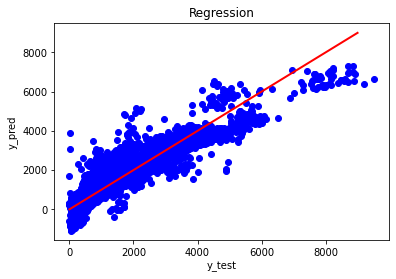

In [52]:
plt.title('Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_regression,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

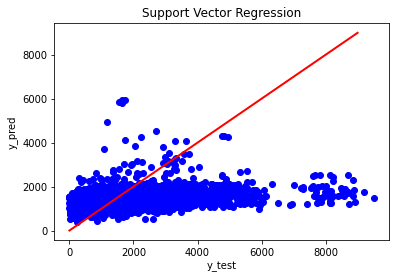

In [53]:
plt.title('Support Vector Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_svr,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

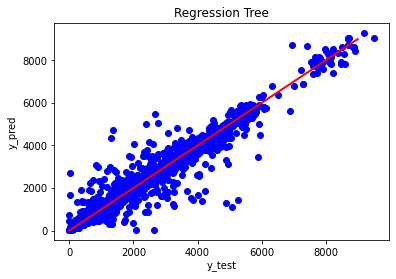

In [54]:
plt.title('Regression Tree')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_dtr,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

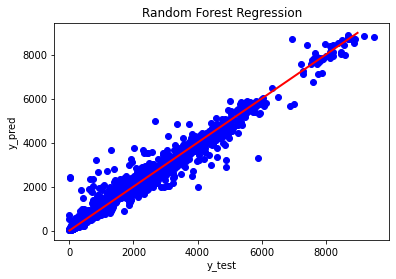

In [55]:
plt.title('Random Forest Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_rfr,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

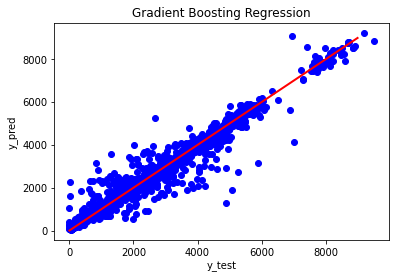

In [56]:
plt.title('Gradient Boosting Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_gbr,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

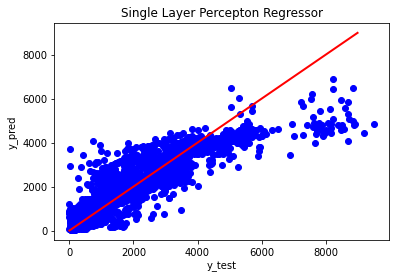

In [57]:
plt.title('Single Layer Percepton Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_slp,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

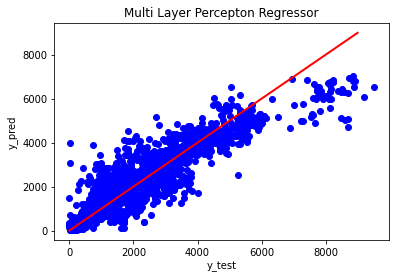

In [58]:
plt.title('Multi Layer Percepton Regressor')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred_mlp,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

# Residual

In [59]:
def get_mean(y_actual,y_predict_model):
  return np.around(np.array(y_actual-y_predict_model).mean(), decimals=2)

In [60]:
y_actual_LP = station_LP_df['PassengerCount']
station_LP_df.drop('PassengerCount', axis=1, inplace=True)

y_pred_regression_LP = regression.predict(station_LP_df)
y_pred_svr_LP = svr.predict(station_LP_df)
y_pred_dtr_LP = dtr.predict(station_LP_df)
y_pred_rfr_LP = rfr.predict(station_LP_df)
y_pred_gbr_LP = gbr.predict(station_LP_df)
y_pred_slp_LP = slp.predict(station_LP_df)
y_pred_mlp_LP = mlp.predict(station_LP_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


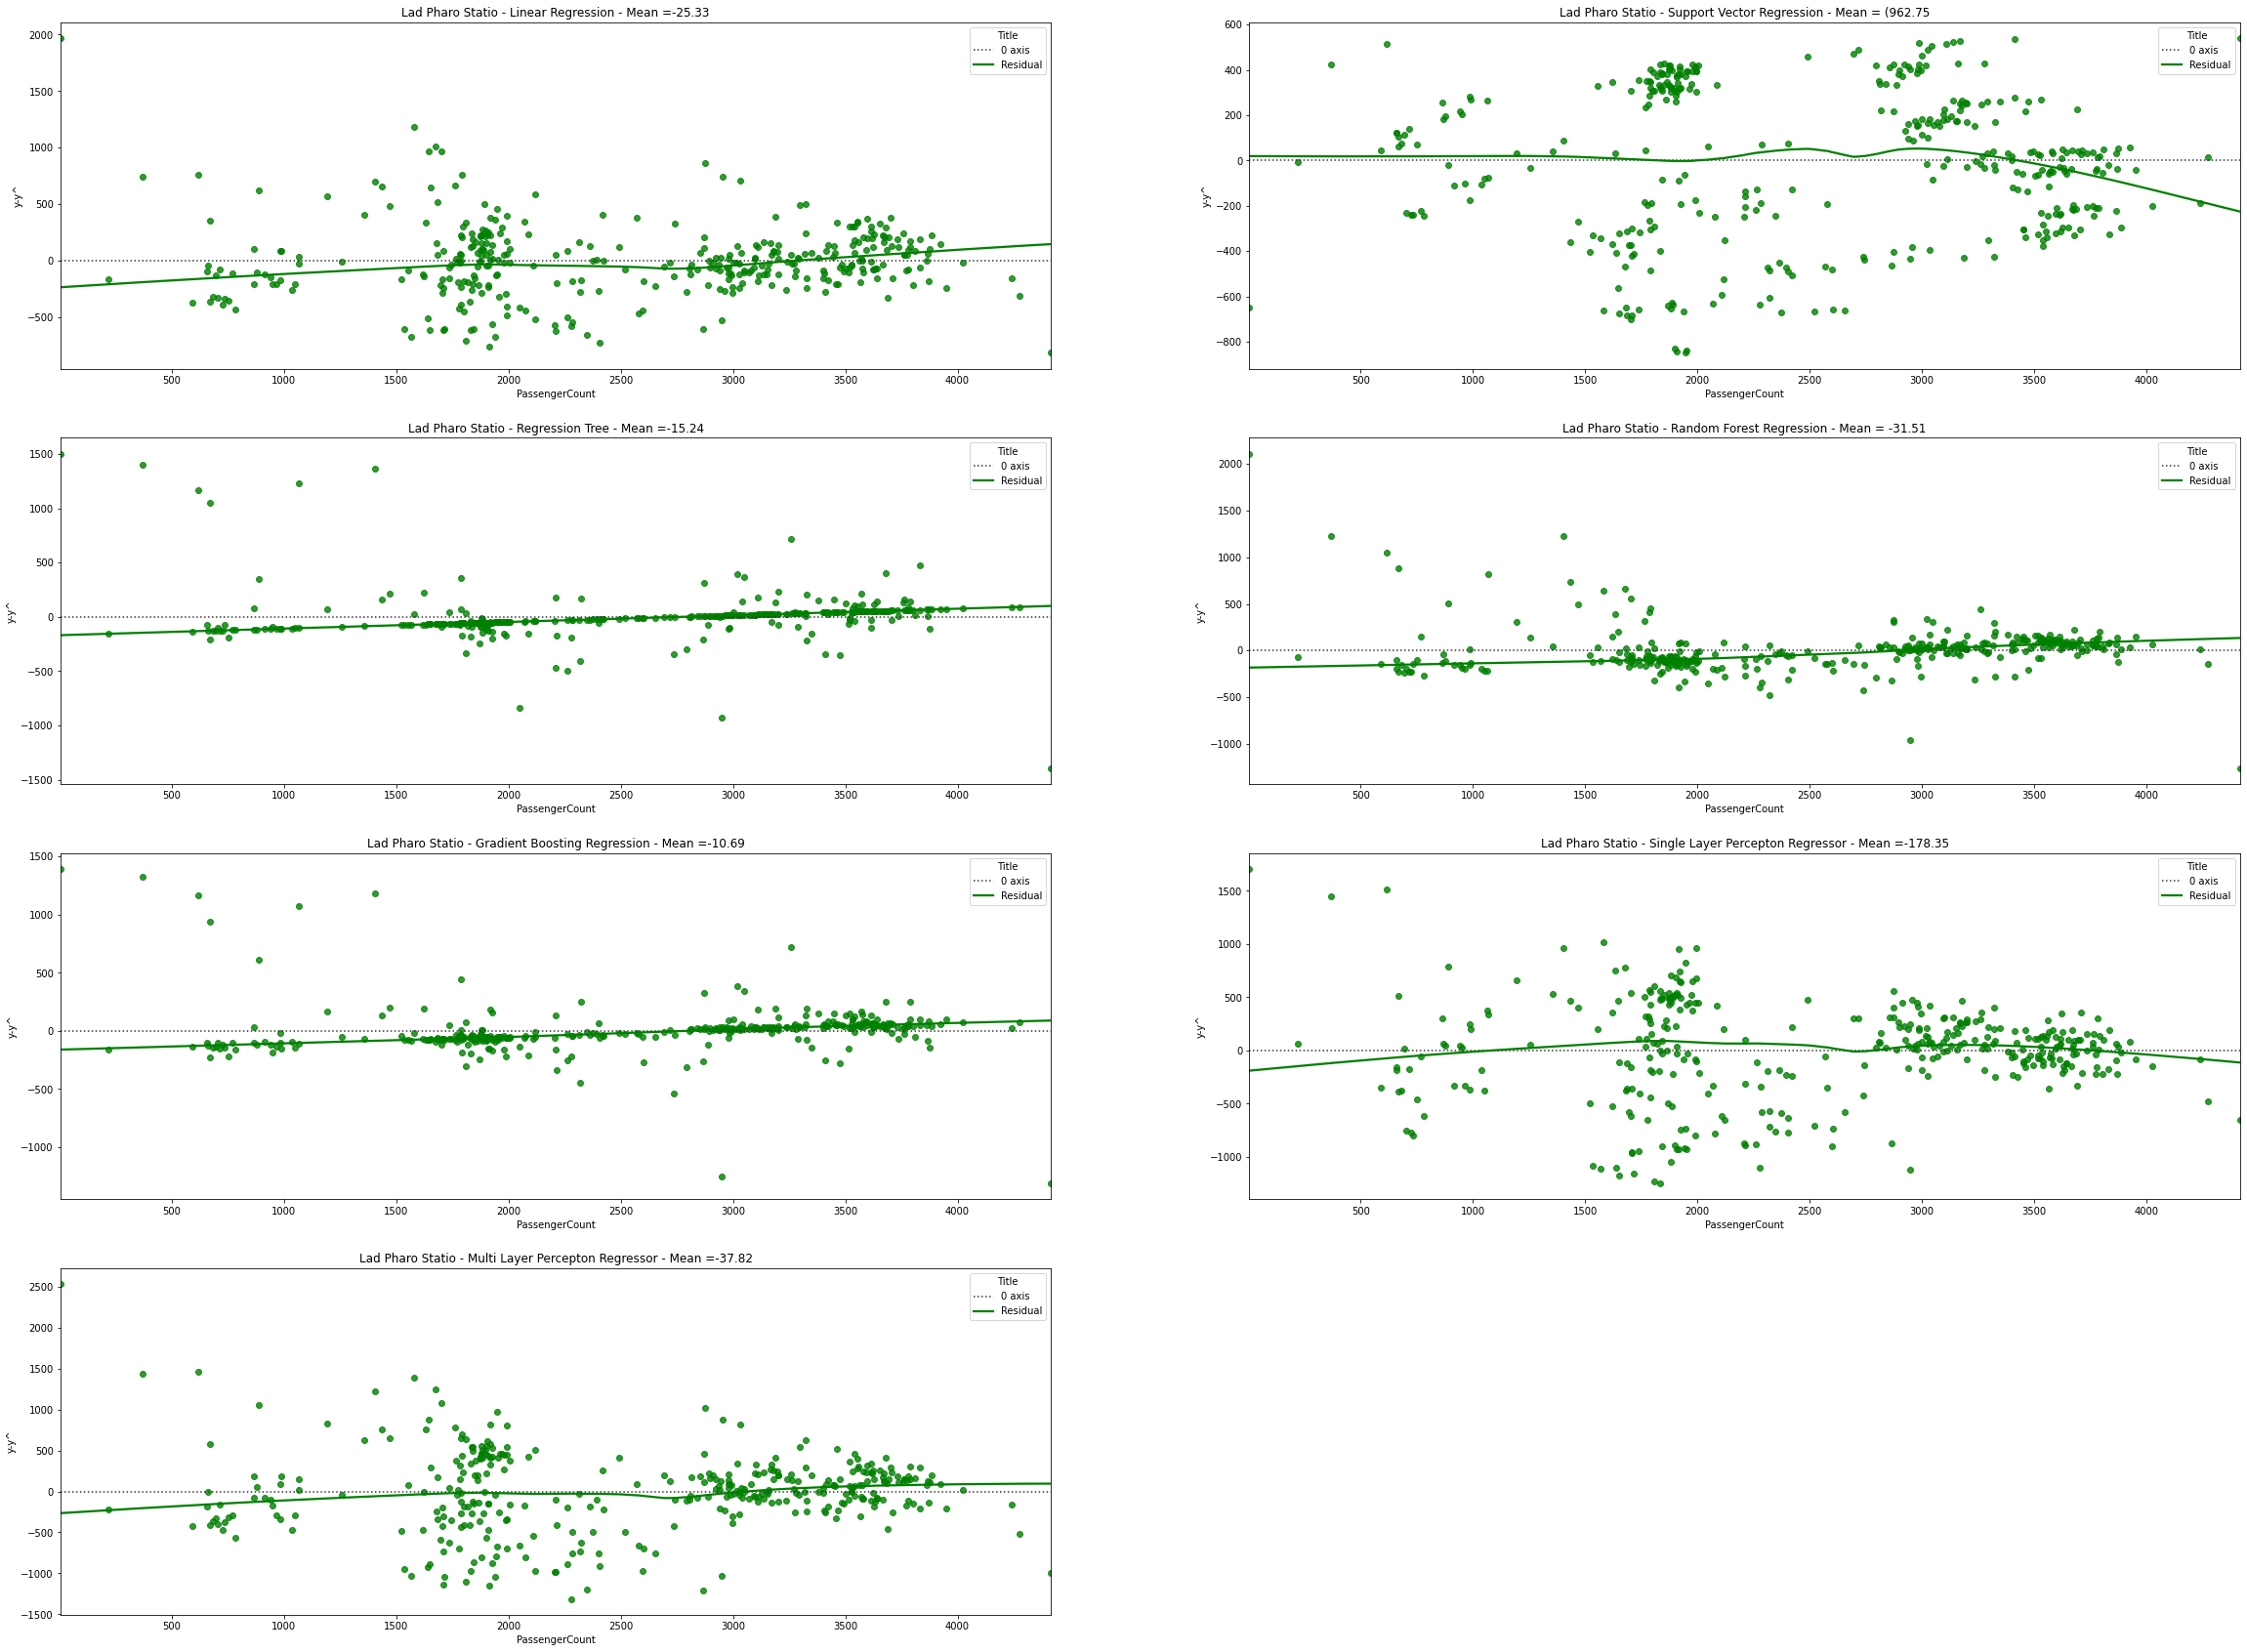

In [61]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(40, 30, forward=True)

ax = fig.add_subplot(4, 2, 1)
g = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_regression_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Linear Regression - Mean ='+str(get_mean(y_actual_LP,y_pred_regression_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 2)
h = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_svr_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Support Vector Regression - Mean = ('+str(get_mean(y_actual_LP,y_pred_svr_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 3)
h = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_dtr_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Regression Tree - Mean ='+str(get_mean(y_actual_LP,y_pred_dtr_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 4)
h = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_rfr_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Random Forest Regression - Mean = '+str(get_mean(y_actual_LP,y_pred_rfr_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 5)
h = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_gbr_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Gradient Boosting Regression - Mean ='+str(get_mean(y_actual_LP,y_pred_gbr_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 6)
h = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_slp_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Single Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_LP,y_pred_slp_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 7)
h = sns.residplot(
    x=y_actual_LP , 
    y=y_pred_mlp_LP , 
    lowess=True, color="g").set(title='Lad Pharo Statio - Multi Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_LP,y_pred_mlp_LP)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

plt.show()

In [62]:
y_actual_PR9 = station_PR9_df['PassengerCount']
station_PR9_df.drop('PassengerCount', axis=1, inplace=True)

y_pred_regression_PR9 = regression.predict(station_PR9_df)
y_pred_svr_PR9 = svr.predict(station_PR9_df)
y_pred_dtr_PR9 = dtr.predict(station_PR9_df)
y_pred_rfr_PR9 = rfr.predict(station_PR9_df)
y_pred_gbr_PR9 = gbr.predict(station_PR9_df)
y_pred_slp_PR9 = slp.predict(station_PR9_df)
y_pred_mlp_PR9 = mlp.predict(station_PR9_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


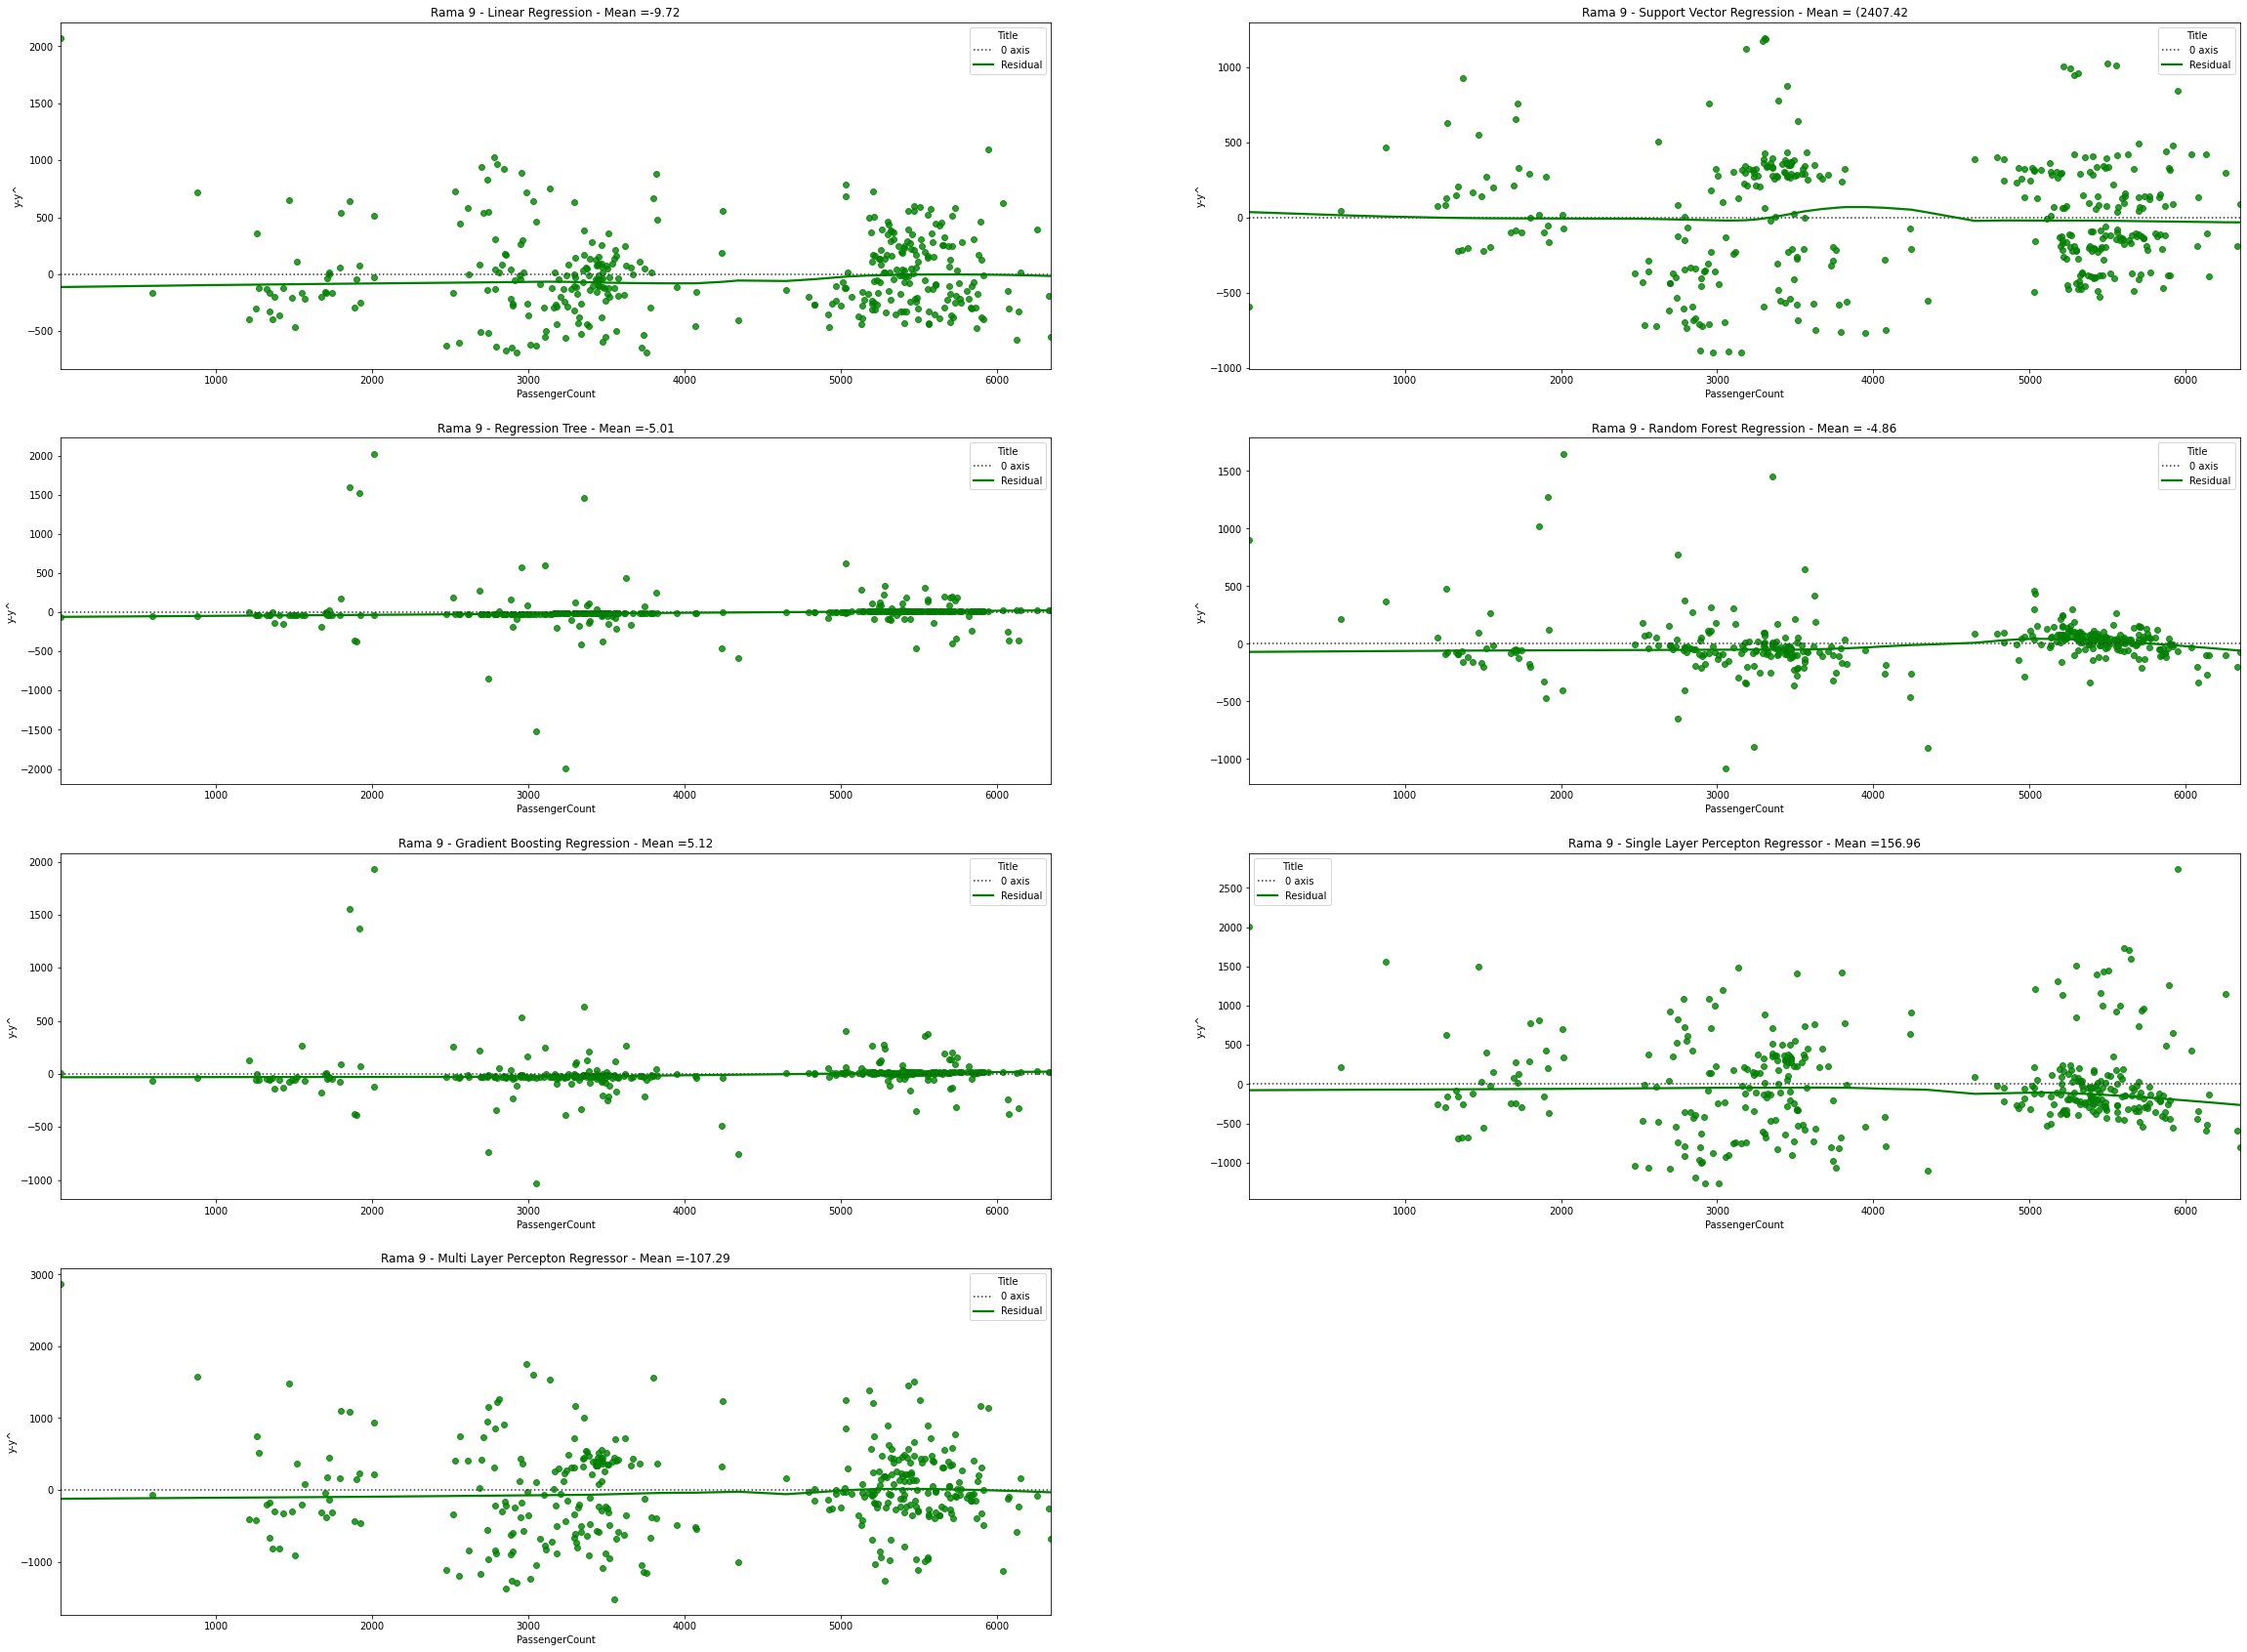

In [63]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(40, 30, forward=True)

ax = fig.add_subplot(4, 2, 1)
g = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_regression_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Linear Regression - Mean ='+str(get_mean(y_actual_PR9,y_pred_regression_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 2)
h = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_svr_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Support Vector Regression - Mean = ('+str(get_mean(y_actual_PR9,y_pred_svr_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 3)
h = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_dtr_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Regression Tree - Mean ='+str(get_mean(y_actual_PR9,y_pred_dtr_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 4)
h = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_rfr_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Random Forest Regression - Mean = '+str(get_mean(y_actual_PR9,y_pred_rfr_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 5)
h = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_gbr_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Gradient Boosting Regression - Mean ='+str(get_mean(y_actual_PR9,y_pred_gbr_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 6)
h = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_slp_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Single Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_PR9,y_pred_slp_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 7)
h = sns.residplot(
    x=y_actual_PR9 , 
    y=y_pred_mlp_PR9 , 
    lowess=True, color="g").set(title='Rama 9 - Multi Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_PR9,y_pred_mlp_PR9)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

plt.show()

In [64]:
y_actual_Sirikit = station_Sirikit_df['PassengerCount']
station_Sirikit_df.drop('PassengerCount', axis=1, inplace=True)

y_pred_regression_Sirikit = regression.predict(station_Sirikit_df)
y_pred_svr_Sirikit = svr.predict(station_Sirikit_df)
y_pred_dtr_Sirikit = dtr.predict(station_Sirikit_df)
y_pred_rfr_Sirikit = rfr.predict(station_Sirikit_df)
y_pred_gbr_Sirikit = gbr.predict(station_Sirikit_df)
y_pred_slp_Sirikit = slp.predict(station_Sirikit_df)
y_pred_mlp_Sirikit = mlp.predict(station_Sirikit_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


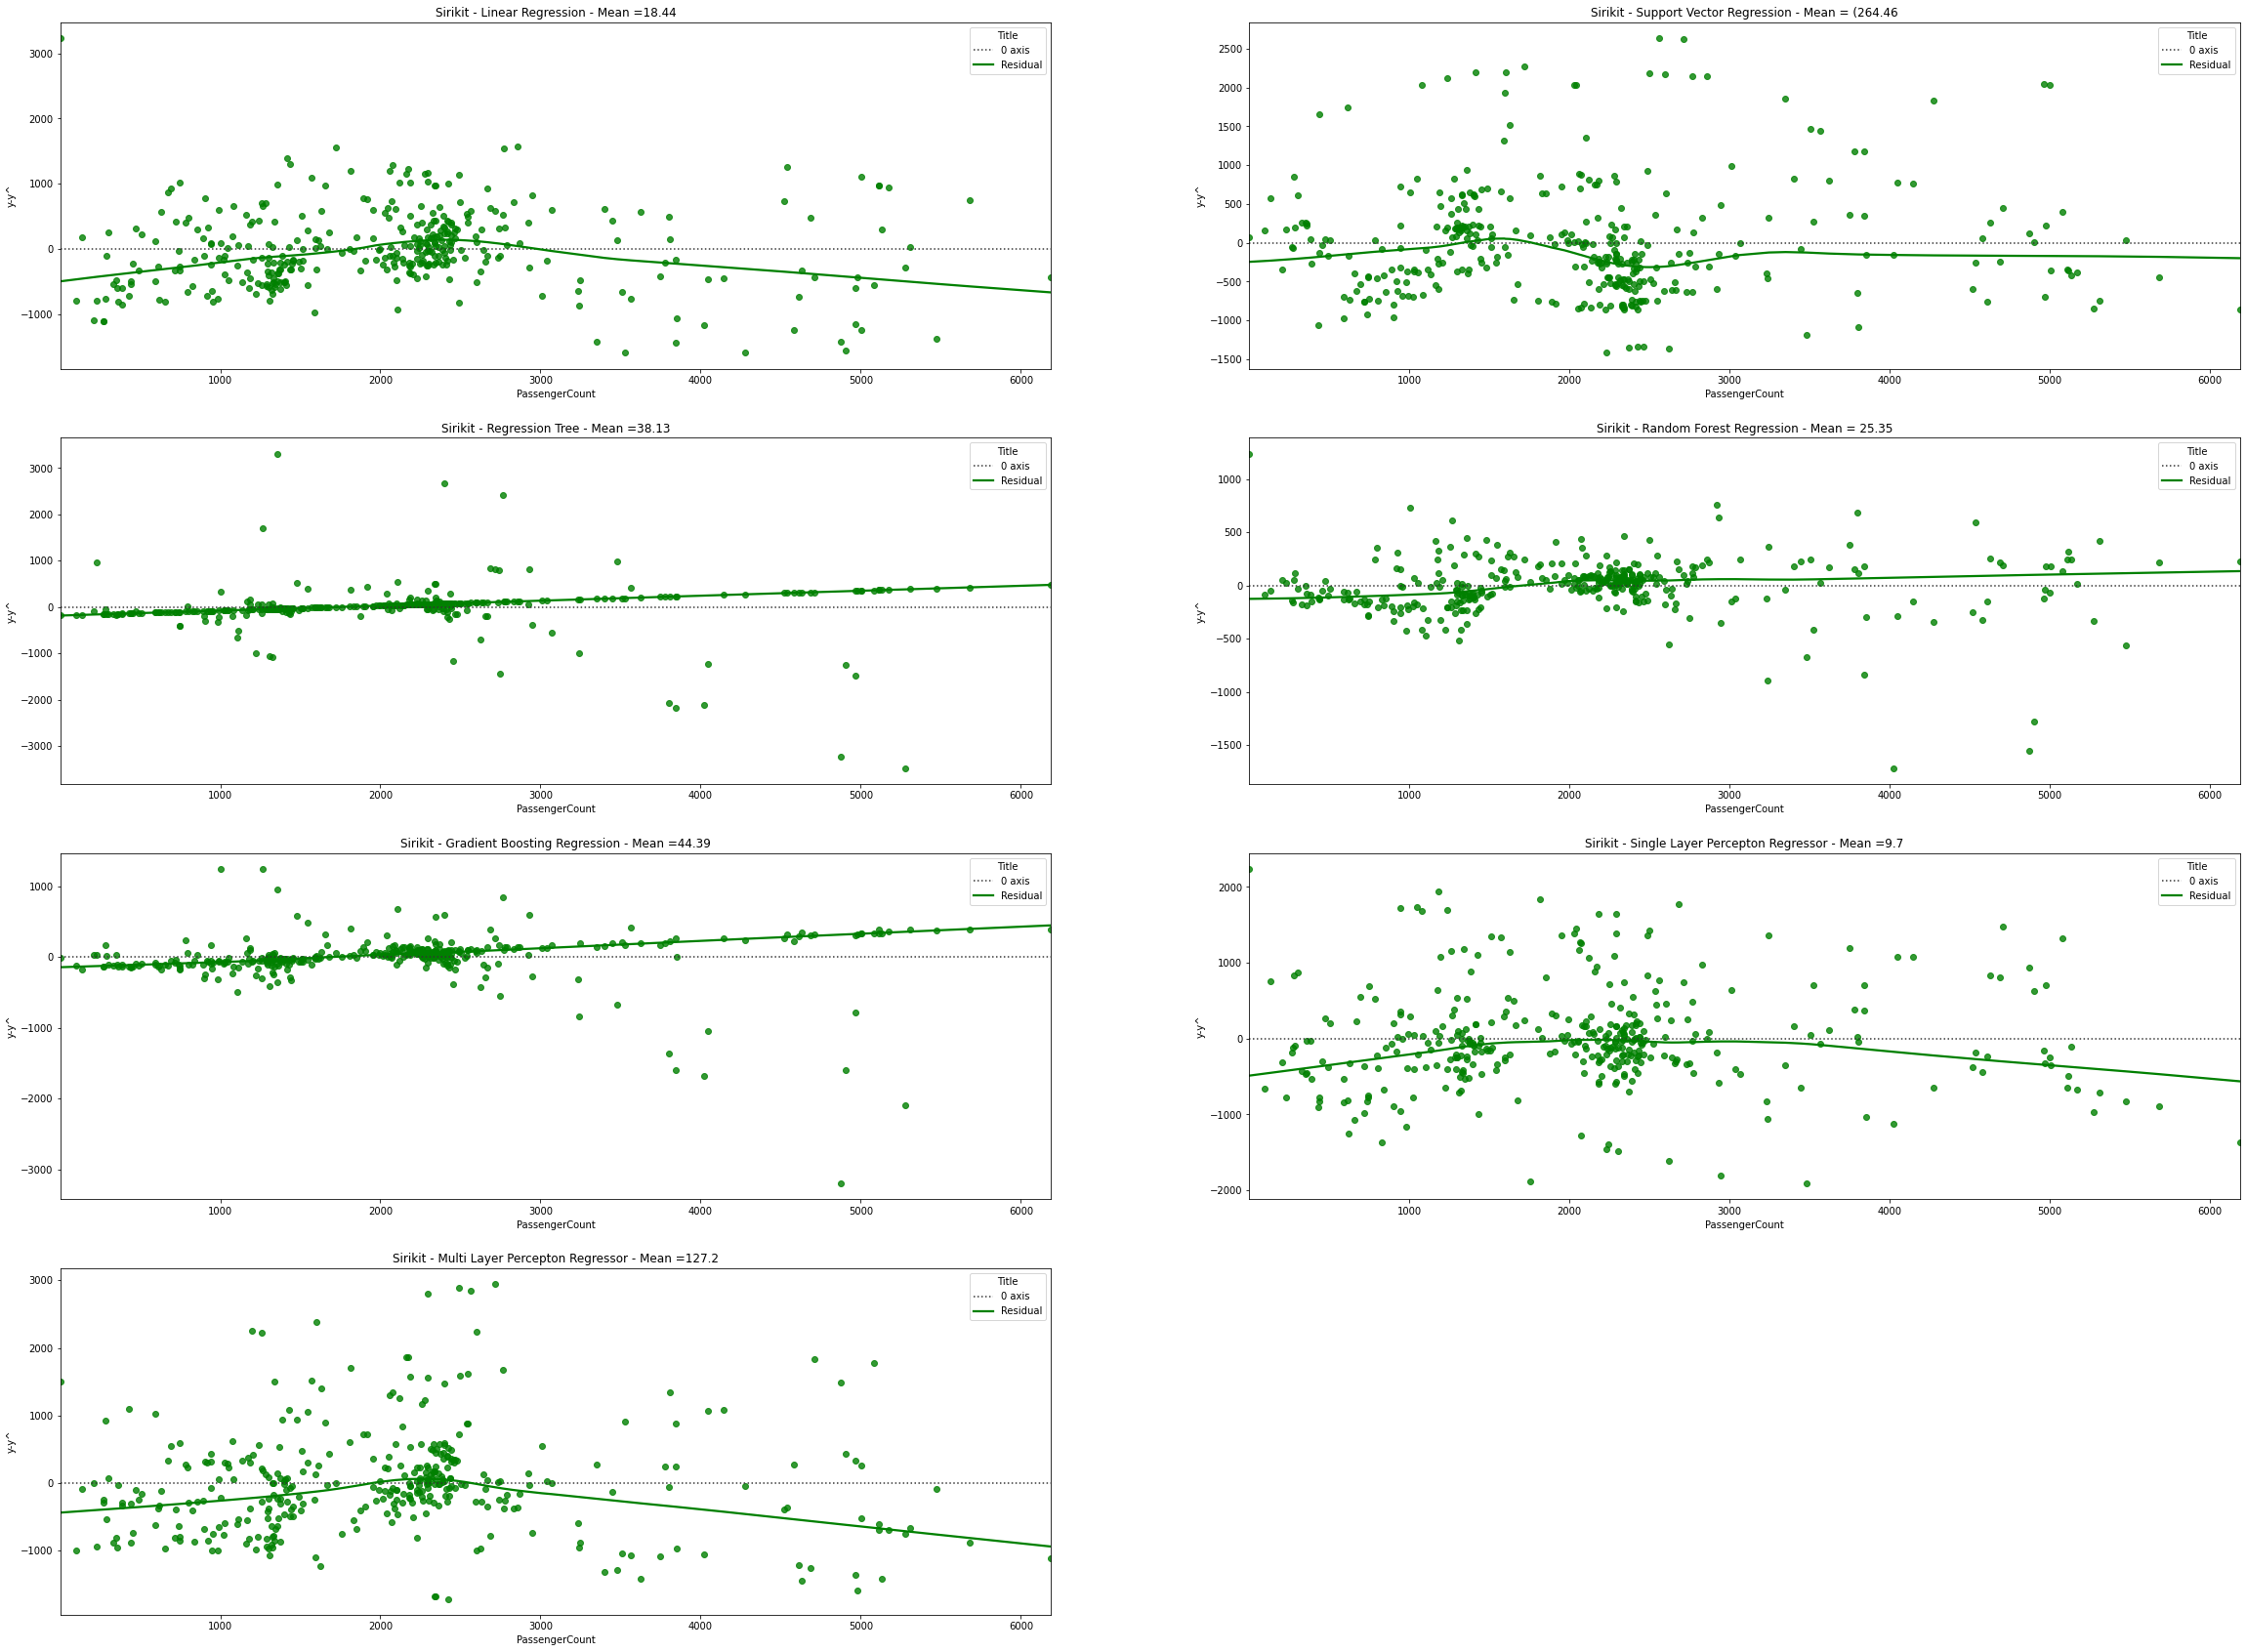

In [68]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(40, 30, forward=True)

ax = fig.add_subplot(4, 2, 1)
g = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_regression_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Linear Regression - Mean ='+str(get_mean(y_actual_Sirikit,y_pred_regression_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 2)
h = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_svr_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Support Vector Regression - Mean = ('+str(get_mean(y_actual_Sirikit,y_pred_svr_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 3)
h = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_dtr_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Regression Tree - Mean ='+str(get_mean(y_actual_Sirikit,y_pred_dtr_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 4)
h = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_rfr_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Random Forest Regression - Mean = '+str(get_mean(y_actual_Sirikit,y_pred_rfr_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 5)
h = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_gbr_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Gradient Boosting Regression - Mean ='+str(get_mean(y_actual_Sirikit,y_pred_gbr_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 6)
h = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_slp_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Single Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_Sirikit,y_pred_slp_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 7)
h = sns.residplot(
    x=y_actual_Sirikit , 
    y=y_pred_mlp_Sirikit , 
    lowess=True, color="g").set(title='Sirikit - Multi Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_Sirikit,y_pred_mlp_Sirikit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

plt.show()

In [66]:
y_actual_Sukhumvit = station_Sukhumvit_df['PassengerCount']
station_Sukhumvit_df.drop('PassengerCount', axis=1, inplace=True)

y_pred_regression_Sukhumvit = regression.predict(station_Sukhumvit_df)
y_pred_svr_Sukhumvit = svr.predict(station_Sukhumvit_df)
y_pred_dtr_Sukhumvit = dtr.predict(station_Sukhumvit_df)
y_pred_rfr_Sukhumvit = rfr.predict(station_Sukhumvit_df)
y_pred_gbr_Sukhumvit = gbr.predict(station_Sukhumvit_df)
y_pred_slp_Sukhumvit = slp.predict(station_Sukhumvit_df)
y_pred_mlp_Sukhumvit = mlp.predict(station_Sukhumvit_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


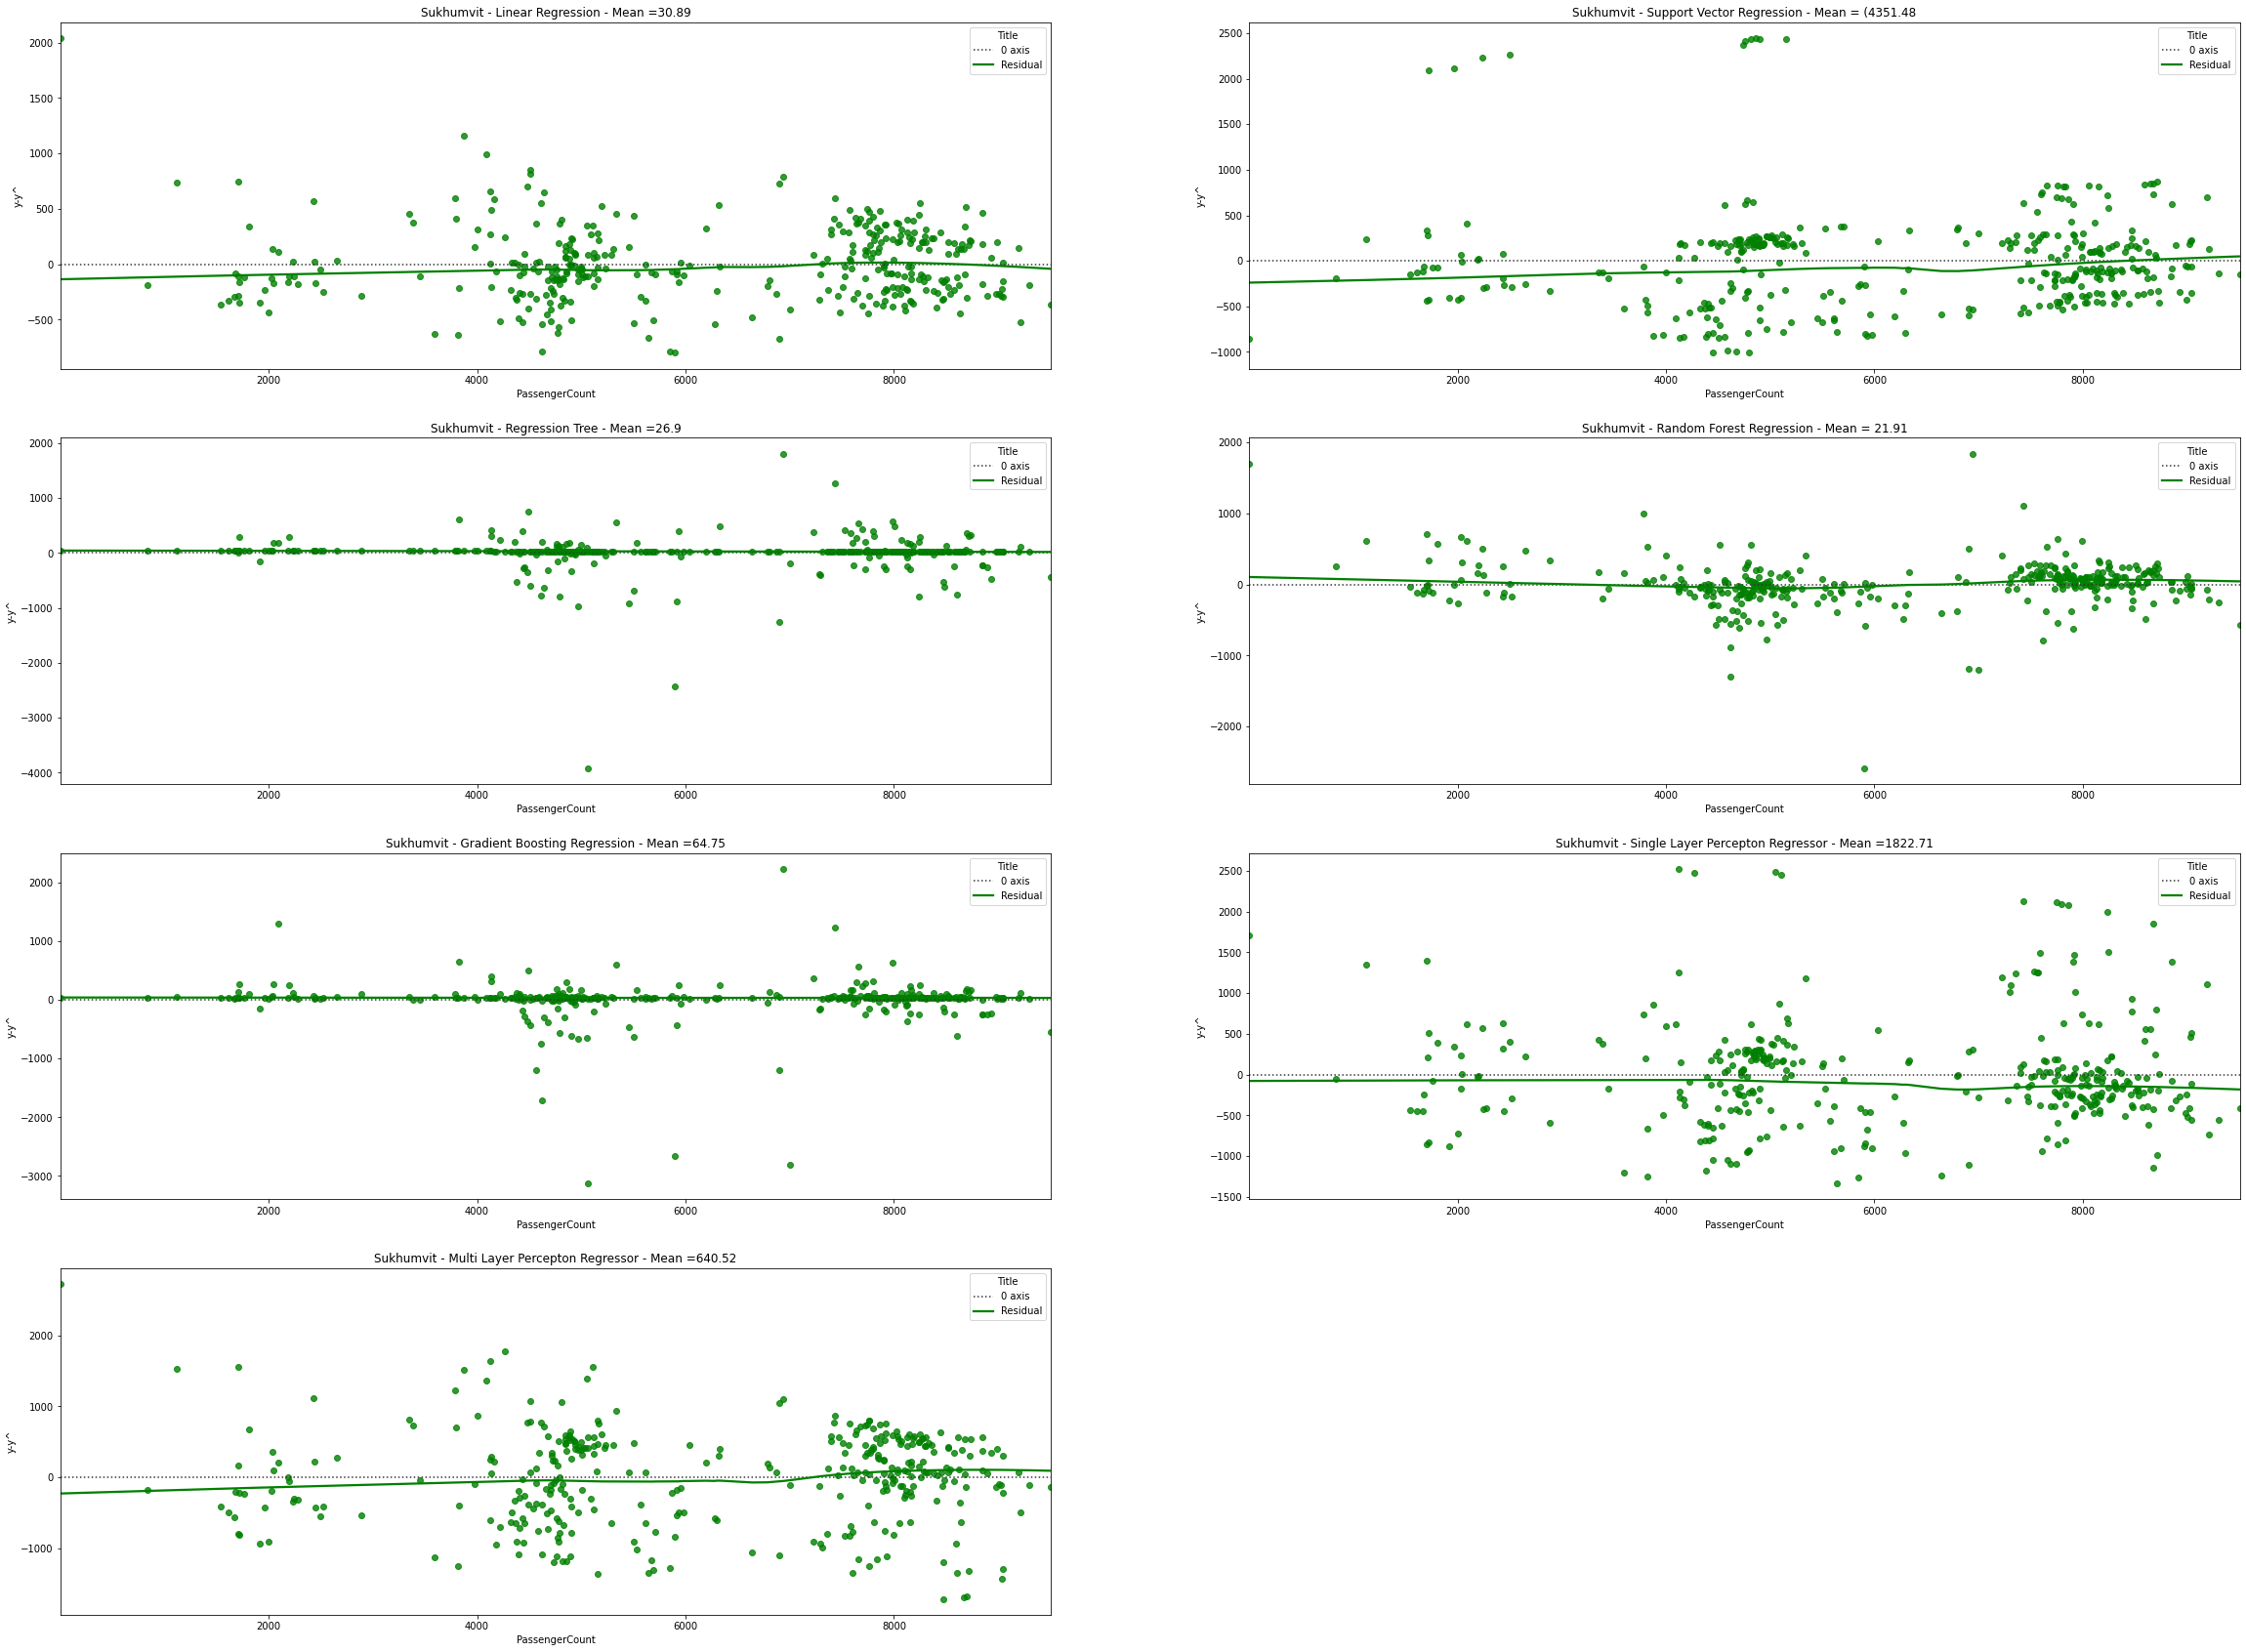

In [69]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(40, 30, forward=True)

ax = fig.add_subplot(4, 2, 1)
g = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_regression_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Linear Regression - Mean ='+str(get_mean(y_actual_Sukhumvit,y_pred_regression_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 2)
h = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_svr_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Support Vector Regression - Mean = ('+str(get_mean(y_actual_Sukhumvit,y_pred_svr_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 3)
h = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_dtr_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Regression Tree - Mean ='+str(get_mean(y_actual_Sukhumvit,y_pred_dtr_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 4)
h = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_rfr_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Random Forest Regression - Mean = '+str(get_mean(y_actual_Sukhumvit,y_pred_rfr_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 5)
h = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_gbr_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Gradient Boosting Regression - Mean ='+str(get_mean(y_actual_Sukhumvit,y_pred_gbr_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 6)
h = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_slp_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Single Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_Sukhumvit,y_pred_slp_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

ax = fig.add_subplot(4, 2, 7)
h = sns.residplot(
    x=y_actual_Sukhumvit , 
    y=y_pred_mlp_Sukhumvit , 
    lowess=True, color="g").set(title='Sukhumvit - Multi Layer Percepton Regressor - Mean ='+str(get_mean(y_actual_Sukhumvit,y_pred_mlp_Sukhumvit)), xlabel='PassengerCount', ylabel='y-y^')
plt.legend(title='Title', labels=['0 axis', 'Residual'])

plt.show()

In [74]:
data_residual = {
                  'Linear Regression':[get_mean(y_actual_LP,y_pred_regression_LP),
                                       get_mean(y_actual_PR9,y_pred_regression_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_regression_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_regression_Sukhumvit)
                                       ] ,
                  'Support Vector Regression':[get_mean(y_actual_LP,y_pred_svr_LP),
                                       get_mean(y_actual_PR9,y_pred_svr_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_svr_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_svr_Sukhumvit)
                                       ] ,
                  'Regression Tree':[get_mean(y_actual_LP,y_pred_dtr_LP),
                                       get_mean(y_actual_PR9,y_pred_dtr_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_dtr_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_dtr_Sukhumvit)
                                       ] ,
                  'Random Forest Regression':[get_mean(y_actual_LP,y_pred_rfr_LP),
                                       get_mean(y_actual_PR9,y_pred_rfr_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_rfr_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_rfr_Sukhumvit)
                                       ] ,
                  'Gradient Boosting Regression':[get_mean(y_actual_LP,y_pred_gbr_LP),
                                       get_mean(y_actual_PR9,y_pred_gbr_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_gbr_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_gbr_Sukhumvit)
                                       ] ,
                  'Single Layer Percepton Regressor':[get_mean(y_actual_LP,y_pred_slp_LP),
                                       get_mean(y_actual_PR9,y_pred_slp_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_slp_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_slp_Sukhumvit)
                                       ] ,
                  'Multi Layer Percepton Regressor':[get_mean(y_actual_LP,y_pred_mlp_LP),
                                       get_mean(y_actual_PR9,y_pred_mlp_PR9),
                                       get_mean(y_actual_Sirikit,y_pred_mlp_Sirikit),
                                       get_mean(y_actual_Sukhumvit,y_pred_mlp_Sukhumvit)
                                       ] ,
                 } 
  
residual_df = pd.DataFrame(data_residual, index =['Lad Pharo', 'Rama 9', 'Sirikit', 'Sukhumvit']) 
residual_df

,Linear Regression,Support Vector Regression,Regression Tree,Random Forest Regression,Gradient Boosting Regression,Single Layer Percepton Regressor,Multi Layer Percepton Regressor
Lad Pharo,-25.33,962.75,-15.24,-31.51,-10.69,-178.35,-37.82
Rama 9,-9.72,2407.42,-5.01,-4.86,5.12,156.96,-107.29
Sirikit,18.44,264.46,38.13,25.35,44.39,9.70,127.20
Sukhumvit,30.89,4351.48,26.90,21.91,64.75,1822.71,640.52
